In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from random import choice

from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import Model, Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ls "/content/gdrive/MyDrive/Mask_VGG16/"

best_model.h5  Mask_Data_test	test2.jpg  Transfert_learning_VGG16_Masks.ipynb
Mask_Data      Mask_Data_train	test.jpg


In [5]:
# Define the data generator for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the data generator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the batch size
batch_size = 32

# Define the training and validation data generators

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Mask_VGG16/Mask_Data_train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    classes=['without_mask', 'with_mask'])

val_generator = val_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Mask_VGG16/Mask_Data_test',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    classes=['without_mask', 'with_mask'],
    shuffle=False)

Found 1206 images belonging to 2 classes.
Found 302 images belonging to 2 classes.


In [ ]:
model=InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

for layer in model.layers:
    layer.trainable = False

x = Flatten()(model.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.input, outputs=x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



219055592/219055592 [==============================] - 10s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)  

In [7]:
checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor='accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=10,
    callbacks=[checkpoint])

Epoch 1/10
37/37 [==============================] - ETA: 0s - loss: 1.1535 - accuracy: 0.9625
Epoch 1: accuracy improved from -inf to 0.96252, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 160s 4s/step - loss: 1.1535 - accuracy: 0.9625 - val_loss: 2.3205e-04 - val_accuracy: 1.0000
Epoch 2/10
37/37 [==============================] - ETA: 0s - loss: 0.4076 - accuracy: 0.9915
Epoch 2: accuracy improved from 0.96252 to 0.99148, saving model to best_model.h5
37/37 [==============================] - 25s 672ms/step - loss: 0.4076 - accuracy: 0.9915 - val_loss: 0.0561 - val_accuracy: 0.9965
Epoch 3/10
37/37 [==============================] - ETA: 0s - loss: 0.2929 - accuracy: 0.9872
Epoch 3: accuracy did not improve from 0.99148
37/37 [==============================] - 23s 615ms/step - loss: 0.2929 - accuracy: 0.9872 - val_loss: 0.0973 - val_accuracy: 0.9931
Epoch 4/10
37/37 [==============================] - ETA: 0s - loss: 0.5172 - accuracy: 0.9898
Epoch 4: accuracy did not improve from 0.99148
37/37 [==============================] - 22s 584ms/step - loss: 0.5172 - accuracy: 0.9898 - val_loss: 0.2853 - val_accuracy: 0.9965
Epoch 5/10
3

In [10]:
import shutil

src = "/content/best_model.h5"
dst = "/content/gdrive/MyDrive/Mask_VGG16/best_model.h5"
shutil.copyfile(src, dst)


'/content/gdrive/MyDrive/Mask_VGG16/best_model.h5'

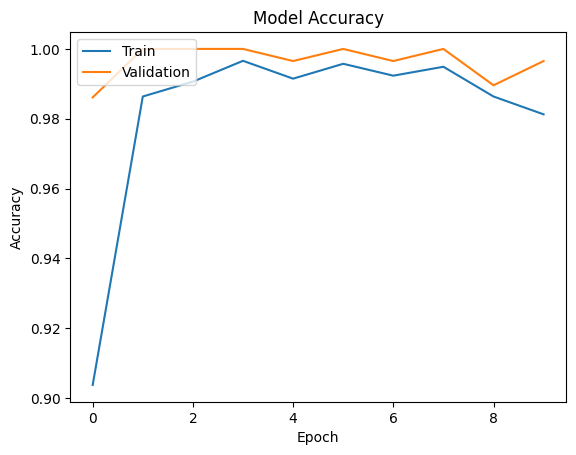

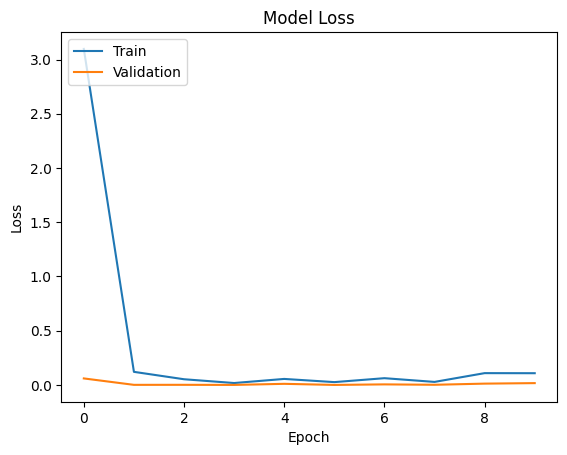

In [56]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1]:
predictions = model.predict(val_generator, steps=val_generator.samples // batch_size)

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(predictions, rowvar=False)

# Display or use the correlation matrix as needed
print("Correlation Matrix:")
print(correlation_matrix)


NameError: ignored

1/1 [==============================] - 5s 5s/step
The person in the image is wearing a mask :  [[1.]]


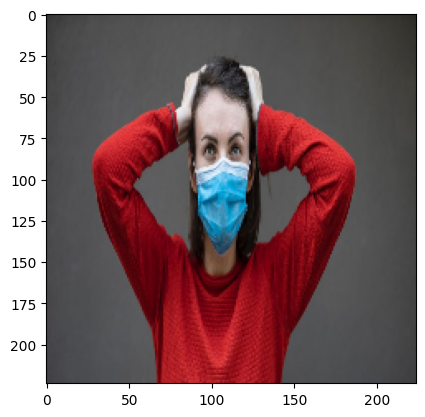

In [57]:
# Load the image
image = cv2.imread('/content/gdrive/MyDrive/Mask_VGG16/test.jpg')

# Resize the image to (224, 224)

image = cv2.resize(image, (224, 224))
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
image=np.expand_dims(image, 0)


# Preprocess the image
# image = np.expand_dims(image, axis=0)
image = image / 255.0

# Make a prediction
prediction = model.predict(image)

# Print the prediction
if prediction < 0.5:
  print('The person in the image is not wearing a mask : ',prediction)
else:
  print('The person in the image is wearing a mask : ',prediction)

In [ ]:
# Calcul de la matrice de confusion
confusion = confusion_matrix(test_generator.classes, y_pred)

# Définir les étiquettes de classe
class_names = ['Avec_Masque', 'Sans_Masque']

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()

# Afficher le rapport de classification
target_names = ['Avec_Masque', 'Sans_Masque']
report = classification_report(test_generator.classes, y_pred, target_names=target_names)
print("Rapport de Classification :\n", report)
